<a href="https://colab.research.google.com/github/Aditya-ai0/Explonatory_datra_analysis/blob/main/Explonatory_data_analysis_on_top_10_indian_cusines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The dataset consists of about 255 Indian dishes and 9 columns associated with each of them.

The 9 columns are as follows:-

name : name of the dish

ingredients : main ingredients used

diet : type of diet - either vegetarian or non vegetarian

prep_time : preparation time

cook_time : cooking time

flavor_profile : flavor profile includes whether the dish is spicy, sweet, bitter, etc

course : course of meal - starter, main course, dessert, etc

state : state where the dish is famous or is originated

region : region where the state belongs

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator

In [2]:
data = pd.read_csv("/content/indian_food.csv") #read our data and stores it into a variable

In [3]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


**data.head() is used to take a general idea of the data set as it shows only first 5 rows of the dataset**

In [4]:
data.head()    #shows the first five rows of data only

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


**If we want to check that how many columns do we have in the dataset we use data.columns**

In [5]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

**data.info() provides the information about the data for eg, about the total number of enteries , number of columns and the data type , is there any null values or not etc.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


**Now if we want to check that wheter there is any null value in our data set in a more precise manner we use the data.isnull().any() method , it tells about the null values present in any column , returns a BOOLEAN value.**

In [7]:
data.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

**Now if we want to check paticular number of null values for all the columns in our data set we use data.isnull().sum()**

In [8]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

**Now in our data set at several places we have -1 but using isnull.any() will not give null because it will read -1 as a value so we need to replace -1 with nan , by using data=data.replace(-1,np.nan) in data and if we have -1 in string for that we have to use data=data.replace('-1',np.nan)**

In [9]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

**Now once again taking a look onm our data** 

In [10]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [11]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

**Now if we want to check the shape of the data we use data.shape , it tells about the number of roiws and columns present in the data set**

In [12]:
data.shape

(255, 9)

**Now declaringa avariable pie_data and taking the diet cloumn and then calling value_count() function and reset_index() function**

In [14]:
pie_data = data.diet.value_counts().reset_index()

**Now generating a pie chart using fig = px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])**

**taking diet and count columns from the data set bold text**

In [15]:
pie_data.columns = ['diet','count']
fig = px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['red', 'yellow'])
fig.show()

**Now we will look upon on the dishes that take highest time for cooking.**

**Analyzing the data set on the basis of cooking time.**


**Defining a variable cooking_time and taking two different variable namley 'cook_time' and 'name' from our data set**

In [20]:
cooking_time= data[['cook_time','name']]

In [21]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


**Now sorting our data in Ascending order**

In [22]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

**Again defining a new variable and taking the top 10 dishes that take least time to prepare**

In [23]:
ten_cook_quickly=cooking_time.head(10)

In [ ]:
#cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()

**Using Bar graph to plotthe values of the dishes that take less time to get prepared**

In [26]:
#cook_data.columns = ['cook_time', 'name']
fig = px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['orange'])
fig.show()

In [27]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

**Now Analyzing the data set on the basis of dishes that take high time to prepare.**

**Similarly  sorting our data in descending order.**

In [28]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

**Taking top 10 dishes that take maximum time to get prepared** 

In [29]:
tencooking_time_longest=cooking_time_longest.head(10)


**Using Matplotlib and plotting out the results.**

In [30]:
import matplotlib.pyplot as plt

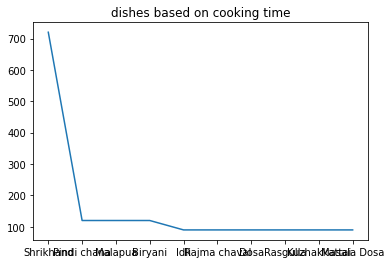

In [31]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()